<a href="https://colab.research.google.com/github/why00n/Machiavellianism/blob/main/%EB%A7%88%ED%82%A4%EC%95%84%EB%B2%A8%EB%A6%AC%EC%A6%98_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data=pd.read_csv(r"C:\Users\yhy99\Downloads\dacon_mkbl\open data\train.csv",index_col=0)
data1=data
data2=data

In [ ]:
Q_A=data.loc[:,data.columns.str.endswith('A')]       
Q_E=data.loc[:,data.columns.str.endswith('E')]

reverse_col=['QaA','QdA','QeA','QfA','QgA','QiA','QkA','QnA','QqA','QrA']

for i in reverse_col:
    Q_A[[i]]=6-Q_A[[i]]
# Q_A데이터프레임의 컬럼명을 리스트 형태로 Q_A_col에 저장 
Q_A_col=list(Q_A.columns)

for i in range(20):
    data1[Q_A_col[i]]=Q_A[Q_A_col[i]]
data1.iloc[0:5,0:20]

data1['score']=data1[Q_A_col].mean(axis=1)

score_min=data1[data1['score']==1].index
data1=data1.drop(score_min)

score_max=data1[data1['score']==5].index
data1=data1.drop(score_max)

wf_01=data1[(data1['wf_01']==1)|(data1['wf_02']==1)|(data1['wf_03']==1)].index
data1=data1.drop(wf_01)

C:\Users\yhy99\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


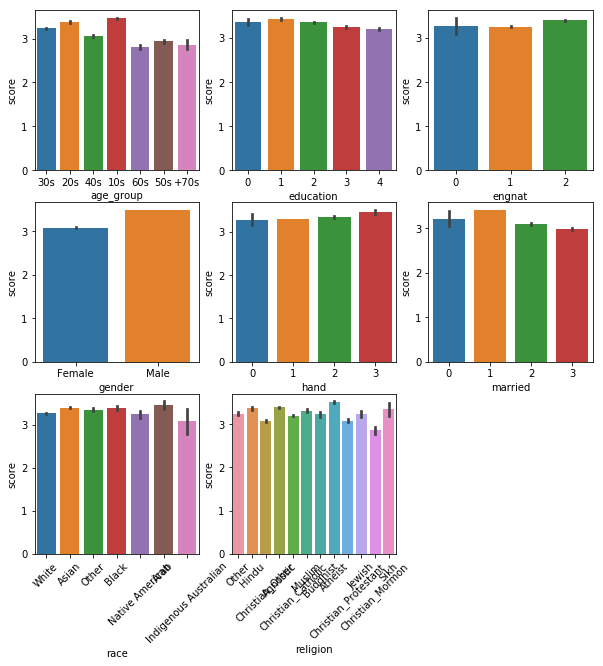

In [ ]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(3,3,1)
sns.barplot(data=data1,x='age_group',y='score')

fig.add_subplot(3,3,2)
sns.barplot(data=data1,x='education',y='score')

fig.add_subplot(3,3,3)
sns.barplot(data=data1,x='engnat',y='score')

fig.add_subplot(3,3,4)
sns.barplot(data=data1,x='gender',y='score')
            
fig.add_subplot(3,3,5)
sns.barplot(data=data1,x='hand',y='score')

fig.add_subplot(3,3,6)
sns.barplot(data=data1,x='married',y='score')

fig.add_subplot(3,3,7)
plt.xticks(rotation=45)
sns.barplot(data=data1,x='race',y='score')

fig.add_subplot(3,3,8)
plt.xticks(rotation=45)
sns.barplot(data=data1,x='religion',y='score')

# plt.xticks(rotation=45)
# sns.barplot(data=data_result,x='religion',y='score')

In [ ]:
age_voted=data1[['age_group','voted','score']]
gen_voted=data1[['gender','voted','score']]

Male      17762
Female    15704
Name: gender, dtype: int64


gender
Female    3.080333
Male      3.490753
Name: score, dtype: float64


voted          1         2
gender                    
Female  2.989333  3.154371
Male    3.420621  3.545364


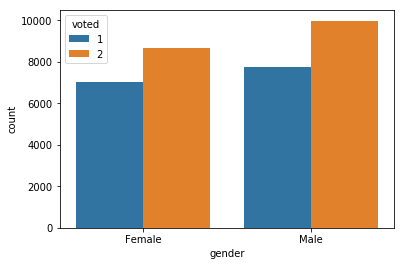

In [ ]:
print(data1['gender'].value_counts())
print('\n')
print(data1.groupby(['gender'])['score'].mean())
print('\n')
print(data1.groupby(['gender','voted'])['score'].mean().unstack())
data1_groupby_s=data1.groupby(['gender']).mean()
sns.countplot(x='gender',hue=data1['voted'],data=gen_voted)

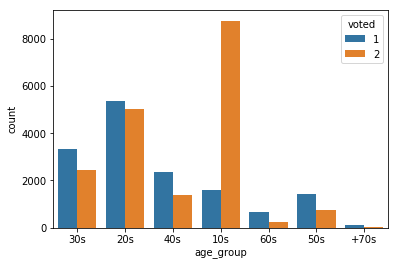

In [ ]:
# 나이대 별 투표 유무 확인
sns.countplot(x='age_group',hue=data1['voted'],data=age_voted)

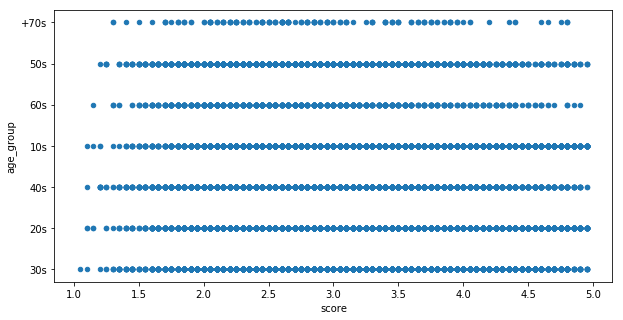

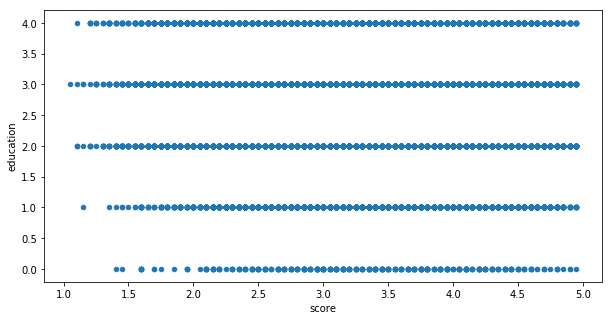

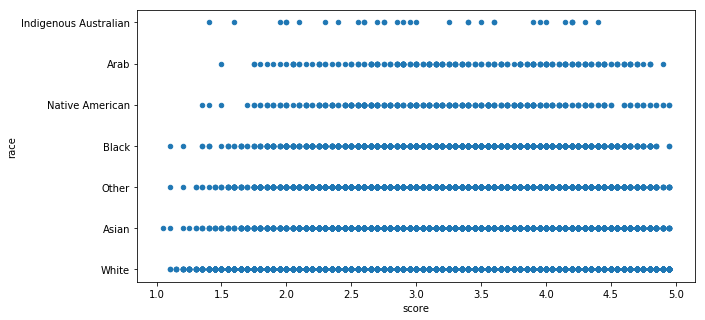

In [ ]:
#기계학습과 데이터 분석 툴을 제공하는 scikit-learn 패키지 중 model_selectiond의 데이터 분할을 위한 train_test_split 함수 import.
from sklearn.model_selection import train_test_split

train_test_split(data1[['age_group']],
                data1['score'])

# sklearn 라이브러리에서 선형회귀분석 모듈 사용
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# 종속 변수 (Y)  1. score   2. voted
smpl_lr=data1[['age_group','gender','race','education','voted','score']]
smpl_lr.head()

smpl_lr.plot(kind='scatter',x='score', y='age_group',figsize=(10, 5))
plt.show()

smpl_lr.plot(kind='scatter',x='score',y='education',figsize=(10, 5))
plt.show()

smpl_lr.plot(kind='scatter',x='score',y='race',figsize=(10, 5))
plt.show()
plt.close()

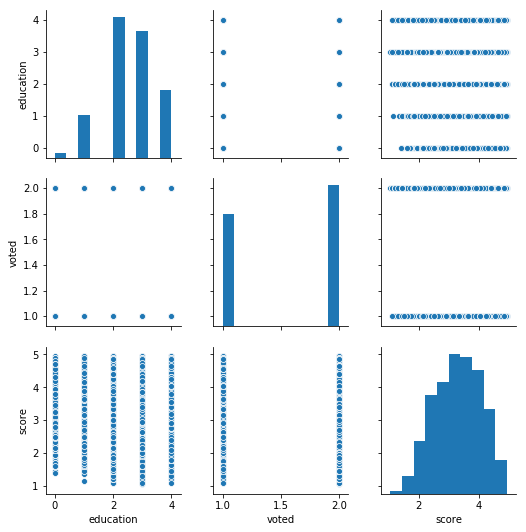

In [ ]:
grid_smpl_lr=sns.pairplot(smpl_lr)
plt.show()
plt.close()

In [ ]:
#data2=data1[['age_group','gender','education','race','religion','hand','engnat','married','score']]
data2=pd.merge(data1,data['wr_06'],how='inner',on='index')

data2=data2[['age_group','gender','education','race','religion','hand','engnat','married','score','voted']]
data2.head()


,age_group,gender,education,race,religion,hand,engnat,married,score,voted
index,,,,,,,,,,
0,30s,Female,2,White,Other,1,1,3,2.95,2
1,20s,Female,4,Asian,Hindu,1,2,1,2.60,2
3,20s,Female,4,Asian,Hindu,1,2,1,3.35,1
5,40s,Female,2,White,Other,1,1,3,2.20,2
8,20s,Female,4,Other,Christian_Other,2,2,1,3.10,1


In [ ]:
print(data2['gender'].unique())
print(data2['race'].unique())
# 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환 ( 더미 변수 만들기 )
gender_oh=pd.get_dummies(data2['gender'])
data2=pd.concat([data2,gender_oh],axis=1)

race_oh=pd.get_dummies(data2['race'])
data2=pd.concat([data2,race_oh],axis=1)

# concat() 함수로 더미변수 열을 기존 데이터프레임에 연결하고 기존 gender열 삭제
# data2=pd.concat([data2,gender_oh],axis=1)
# data2=pd.concat([data2,race_oh],axis=1)

data2.drop(['age_group','gender','religion','race'],axis=1,inplace=True)
data2.head()

['Female' 'Male']
['White' 'Asian' 'Other' 'Black' 'Native American' 'Arab'
 'Indigenous Australian']


,education,hand,engnat,married,score,voted,Female,Male,Arab,Asian,Black,Indigenous Australian,Native American,Other,White
index,,,,,,,,,,,,,,,
0,2,1,1,3,2.95,2,1,0,0,0,0,0,0,0,1
1,4,1,2,1,2.60,2,1,0,0,1,0,0,0,0,0
3,4,1,2,1,3.35,1,1,0,0,1,0,0,0,0,0
5,2,1,1,3,2.20,2,1,0,0,0,0,0,0,0,1
8,4,2,2,1,3.10,1,1,0,0,0,0,0,0,1,0


In [ ]:
#  훈련 / 검증 데이터 분할

# 설명 변수 X
x=data2[['education','hand','engnat','married','score','Female','Male','Arab','Asian','Black','Indigenous Australian','Native American','Other','White']]

# 예측 변수 Y 
y=data2['voted']

# 설명 변수 데이터를 정규화( normalization ) - 설명변수 열들이 갖는 데이터의 상대적 크기 차이를 없애기 위해서 정규화 과정 거침
# 이때 sklearn의  preprocessing 모듈 사용
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

# train data 와 test data 로 구분
# 이때 train_test_split() 메소드를 사용 -> 훈련 데이터와 검증 데이터 를 나눔 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)  # 검증 30% 


print(x_train.shape)
print(x_test.shape)

C:\Users\yhy99\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yhy99\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [ ]:
# 모형 학습 및 검증

# sklearn 라이브러리의 neighbors 모듈을 사용한다. 
from sklearn.neighbors import KNeighborsClassifier
